# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
*  is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## План работы
* Предобработка данных
 * Обработка пропусков
 * Обработка дубликатов
 * Обработка выбросов
 * Изменение типов столбцов
* Добавление новых вспомогательных столбцов с данными
 * цена одного квадратного метра
 * день недели публикации объявления 
 * месяц публикации объявления
 * год публикации объявления
 * тип этажа квартиры 
 * расстояние до центра города в километрах 
* Исследовательский анализ данных
 * Исследование параметров
 * Детальное исследование парамиетра скорости продажи квартиры
 * Поиск параметров от которых зависит цена квартиры
 * Подсчёт средней цены одного квадратного метра 
 * Проверка зависисмоти цены квартиры от расстояния до центра в Санкт-Петербурге


## Изучение общей информации о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
try:
    data = pd.read_csv("real_estate_data.csv", sep="\t")
except:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")    
#print info about dataset
print(data.info())
#print first 10 lines
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Видим, что в таблице всего 23699 строк и в большинстве из них есть пропуски

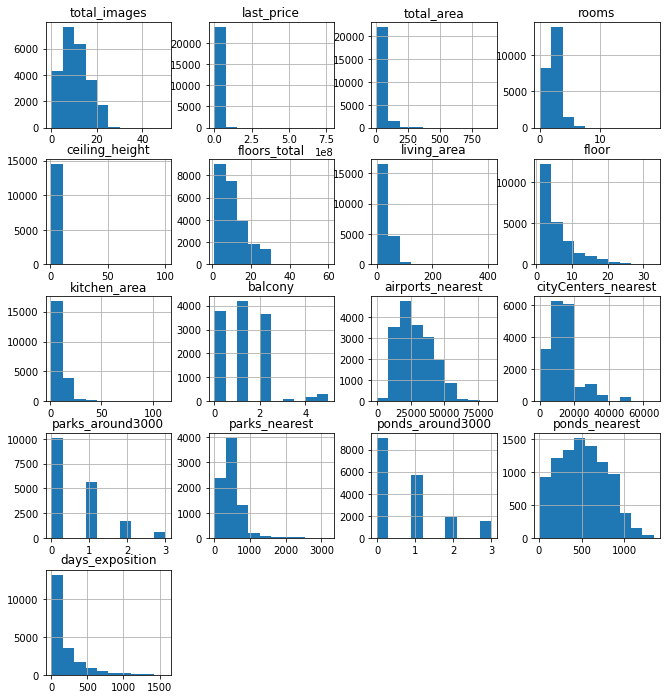

In [3]:
#Create histograms for all column
data.hist(figsize=(11, 12))
plt.show()

В принципе гистограммы большинства столбцов выглядят нормально, но стоит обратить внимание на колонки last_price, total_area и celling_height

Далее будет проведена предобработка данных, в которой мы изучим пропуски в данных и посмотрим, можно ли их заполнить. Проверим наличие выбросов и постараемся их удалить, а также проверим датасет на наличие дубликатов и столбцов с некоррекным типом данных.

## Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<AxesSubplot:>

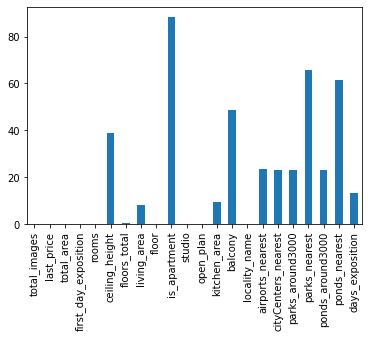

In [5]:
((data.isna().sum() / data.shape[0]) * 100).plot(kind="bar")

Больше 80% пропусков в столбце is_apartment - стоит обратить на него особое внимание. Также большой процент пропусков в колонках ceiling_height, balcony, parks_nearest, ponds_nearest. Есть несколько признаков с долей пропусков больше 50%, так что не стоит бездумно удалять все строки с отсутствующими данными.

In [6]:
data["is_apartment"].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Можем предположить, что если квартира была бы апартаментами, то это бы точно указали, так что заполняем пропуски False

In [7]:
data["is_apartment"].fillna(False, inplace= True)

In [8]:
data["balcony"].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Можем предположить, что не указывают количество балконов, когда их нет, так что заполняем пропуски нулями.

In [9]:
data["balcony"].fillna(0, inplace=True);

In [10]:
data["parks_around3000"].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Из задания ясно, что эти данные заполнялись автоматически из онлайн карт, соответственно пропуск в данном поле может означать отсутствие парка в радиусе 3 км, так что пропуски заполняем нулями. Аналогично заполним столбец ponds_around3000 с водоёмами в радиусе 3 км

In [11]:
data["parks_around3000"].fillna(0, inplace=True)
data["ponds_around3000"].fillna(0, inplace=True)

In [12]:
print(data["parks_nearest"].value_counts().sort_index(ascending=False))
print(data["ponds_nearest"].value_counts().sort_index(ascending=False))

3190.0    2
3064.0    1
3013.0    1
2984.0    1
2905.0    1
         ..
9.0       2
7.0       1
4.0       1
3.0       1
1.0       1
Name: parks_nearest, Length: 995, dtype: int64
1344.0    1
1341.0    2
1337.0    1
1313.0    1
1299.0    1
         ..
22.0      7
20.0      5
19.0      4
16.0      8
13.0      2
Name: ponds_nearest, Length: 1096, dtype: int64


По данным видно, что максимального расстояние до ближайшего парка чуть больше 3000м, что при наличии в данных информации о количестве парков в радиусе 3км может говорить о том, что возможно все парки дальше 3км не учитываются. Стоит проверить эту теорию.

In [13]:
print("количество квартир в которых парков рядом нет и пропуск в поле parks_nearest =",data.query('parks_around3000 == 0 and parks_nearest.isna()')["parks_around3000"].count())
print("количество пропусков в поле parks_nearest =", data["parks_nearest"].isna().sum())

количество квартир в которых парков рядом нет и пропуск в поле parks_nearest = 15620
количество пропусков в поле parks_nearest = 15620


In [14]:
print("количество квартир в которых парков рядом нет и пропуск в поле ponds_nearest =",data.query('ponds_around3000 == 0 and ponds_nearest.isna()')["ponds_around3000"].count())
print("количество пропусков в поле ponds_nearest =", data["ponds_nearest"].isna().sum())

количество квартир в которых парков рядом нет и пропуск в поле ponds_nearest = 14589
количество пропусков в поле ponds_nearest = 14589


Теория подтвердилась как для парков, так и для водоёмов, так что мы не можем никак заполнить эти пропуски.

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
data["ceiling_height"].value_counts().sort_index(ascending=False)

100.00     1
32.00      2
27.50      1
27.00      8
26.00      1
          ..
2.20       1
2.00      11
1.75       1
1.20       1
1.00       1
Name: ceiling_height, Length: 183, dtype: int64

Высота потолка в 100 метров - что-то странное, очевидно наличие выбросов, которые стоит почистить. По закону минимальная высота потолка в квартире - 2.5 метра, так что все значения ниже можем спокойно выбросить. Сверху же выбросами будем считать всё, что за интервалом в 1.5 межквантильных размаха от 3 квантиля.

Создадим функцию для чистки выбросов

In [17]:
def outliers_cleaning(data,column, lower_bound=0, upper_bound=1):
    #Calculate the interquantile range
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    #Calculate lower and upper bounds
    if lower_bound == 0:
        lower_bound = Q1 - 1.5 * IQR        
    if upper_bound == 1:
        upper_bound = Q3 + 1.5 * IQR
    # Return values in the acceptable range
    checking_cleaned_data = data[((column >= lower_bound) & (column <= upper_bound)) | (column.isna())]
    outliers_part = 1 - checking_cleaned_data.shape[0] / data.shape[0]
    if outliers_part < 0.1:
        print(f"Доля выбросов определяемых данным методом {round(outliers_part * 100, 2)}%, они были удалены")
        return checking_cleaned_data
    else:
        print(f"Доля выбросов определяемых данным методом {round(outliers_part * 100, 2)}%, стоит попробовать другой способ")
        return data
    

In [18]:
data = outliers_cleaning(data, data["ceiling_height"], lower_bound=2.5);

Доля выбросов определяемых данным методом 3.74%, они были удалены


<AxesSubplot:>

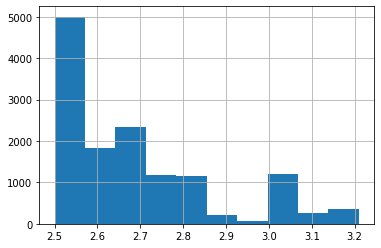

In [20]:
data["ceiling_height"].hist()

От выбросов избавились и гистограмма сразу стала неплохо выглядеть. Пропуски скорее всего вызваны людьми, которые не полностью указали информация о квартире и стоит заполнить пропуски медианным значением.

In [21]:
data["ceiling_height"].fillna(data["ceiling_height"].median(), inplace=True);

In [22]:
data["living_area"].value_counts()

18.00    876
17.00    668
30.00    587
16.00    482
20.00    476
        ... 
96.40      1
35.77      1
40.39      1
95.70      1
16.74      1
Name: living_area, Length: 1667, dtype: int64

Квартир с отрицательной площадью здесь конечно нет, но стоит, как и в прошлом пункте почистить выбросы и заменить пропуски на медианное значение.

In [23]:
# Clear outliers
data = outliers_cleaning(data, data["living_area"])
# Replace missing values with median
data["living_area"].fillna(data["living_area"].median(), inplace=True);

Доля выбросов определяемых данным методом 2.49%, они были удалены


In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               84
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2184
balcony                     0
locality_name              46
airports_nearest         5446
cityCenters_nearest      5427
parks_around3000            0
parks_nearest           15108
ponds_around3000            0
ponds_nearest           14068
days_exposition          2841
dtype: int64

In [25]:
data["kitchen_area"].value_counts(dropna=False)

NaN      2184
6.00     1285
10.00    1194
8.00     1080
9.00     1068
         ... 
21.25       1
27.40       1
5.21        1
11.98       1
16.74       1
Name: kitchen_area, Length: 895, dtype: int64

Чистим выбросы заменяем пропуски на медианные значения.

In [26]:
# Clear outliers
data = outliers_cleaning(data,data["kitchen_area"])
# Replace missing values with median
data["kitchen_area"].fillna(data["kitchen_area"].median(), inplace=True);

Доля выбросов определяемых данным методом 4.25%, они были удалены


In [27]:
print(data["locality_name"].value_counts(dropna=False))
print("Всего пропусков", data["locality_name"].isna().sum())

Санкт-Петербург                                            13649
посёлок Мурино                                               509
посёлок Шушары                                               433
Всеволожск                                                   383
Колпино                                                      328
                                                           ...  
посёлок при железнодорожной станции Вещево                     1
деревня Нижние Осельки                                         1
деревня Пельгора                                               1
деревня Пустынка                                               1
садоводческое некоммерческое товарищество Лесная Поляна        1
Name: locality_name, Length: 361, dtype: int64
Всего пропусков 41


Пропусков мало и их невозможно корректно заполнить, так что просто заменим их на Неизвестно. В столбце обнаружено наличие неявных дубликатов, как минимум встречаются одинаковые названия отличающиеся лишь буков е и ё.

In [28]:
data["locality_name"] = data["locality_name"].fillna("Неизвестно")

Для удаления дубликатов оставим лишь названия населённого пункта с первой заглавной и остальными строчными буквами.

In [29]:
data["locality_name"] = data["locality_name"].apply(lambda row: row.split()[-1].title())

In [30]:
data["airports_nearest"].value_counts().sort_index()

0.0        1
6450.0     2
6914.0     1
6949.0     1
6989.0     6
          ..
83758.0    1
84006.0    1
84665.0    1
84853.0    1
84869.0    1
Name: airports_nearest, Length: 7514, dtype: int64

In [31]:
data = outliers_cleaning(data, data["airports_nearest"])

Доля выбросов определяемых данным методом 0.35%, они были удалены


In [32]:
data["cityCenters_nearest"].value_counts().sort_index()

329.0      1
387.0      1
399.0      1
467.0      2
472.0      1
          ..
53078.0    1
53088.0    1
53294.0    1
60223.0    1
61495.0    1
Name: cityCenters_nearest, Length: 6869, dtype: int64

Ситуация аналогичная прошлому пункту, чистим выбросы и не заполянем пропуски

In [33]:
data = outliers_cleaning(data, data["cityCenters_nearest"])

Доля выбросов определяемых данным методом 8.54%, они были удалены


In [34]:
data['days_exposition'].value_counts().sort_index()

1.0         1
2.0         3
3.0       137
4.0       150
5.0       133
         ... 
1484.0      1
1497.0      1
1513.0      1
1553.0      1
1580.0      1
Name: days_exposition, Length: 1070, dtype: int64

Очевидных выбросов не видно, но всё-таки стоит их почистить. Возможно пропуски вызваны тем, что квартира ещё не продана, проверим это.

In [35]:
data = outliers_cleaning(data, data["days_exposition"])

Доля выбросов определяемых данным методом 7.42%, они были удалены


In [36]:
null_amount_by_time = data.groupby("first_day_exposition")["days_exposition"].apply(lambda x: x.isnull().sum())
null_amount_by_time.value_counts()

0     733
1     249
2     101
3      63
4      50
5      17
7      14
6      12
10      8
14      7
24      5
23      5
17      5
9       5
12      5
8       5
18      4
15      3
11      3
19      3
25      3
29      2
13      2
22      2
16      2
21      1
20      1
26      1
27      1
30      1
31      1
32      1
35      1
37      1
Name: days_exposition, dtype: int64

Посмотрим на те даты выкладки объявлений у которых много пропусков.

In [37]:
print(null_amount_by_time[null_amount_by_time > 10])

first_day_exposition
2018-03-26T00:00:00    12
2018-12-12T00:00:00    11
2019-01-22T00:00:00    11
2019-01-29T00:00:00    14
2019-02-12T00:00:00    19
2019-02-19T00:00:00    13
2019-02-21T00:00:00    17
2019-02-25T00:00:00    12
2019-02-26T00:00:00    19
2019-02-27T00:00:00    14
2019-03-04T00:00:00    18
2019-03-05T00:00:00    17
2019-03-06T00:00:00    17
2019-03-11T00:00:00    15
2019-03-12T00:00:00    14
2019-03-13T00:00:00    24
2019-03-14T00:00:00    18
2019-03-15T00:00:00    18
2019-03-17T00:00:00    15
2019-03-18T00:00:00    23
2019-03-19T00:00:00    23
2019-03-20T00:00:00    12
2019-03-21T00:00:00    20
2019-03-22T00:00:00    18
2019-03-23T00:00:00    12
2019-03-25T00:00:00    16
2019-03-26T00:00:00    17
2019-03-27T00:00:00    12
2019-03-28T00:00:00    14
2019-03-29T00:00:00    22
2019-03-31T00:00:00    11
2019-04-01T00:00:00    24
2019-04-02T00:00:00    24
2019-04-03T00:00:00    21
2019-04-04T00:00:00    30
2019-04-05T00:00:00    22
2019-04-06T00:00:00    19
2019-04-08T00:00:

Все значения с большим количество пропусков это 2019 год, проведём последнее уточнение

In [38]:
print(data["days_exposition"].isna().sum())
years = ["2014", "2015", "2016", "2017", "2018", "2019"]
for year in years:
    null_amount = null_amount_by_time.loc[null_amount_by_time.index.str.contains(year)].sum()
    print(f"В {year} году всего {null_amount} пропусков")

2439
В 2014 году всего 7 пропусков
В 2015 году всего 38 пропусков
В 2016 году всего 43 пропусков
В 2017 году всего 170 пропусков
В 2018 году всего 721 пропусков
В 2019 году всего 1460 пропусков


Видим, что количество пропусков с годами растёт, причём большинство из них в последних двух годах. Это намекает на то, что пропуски вызваны отсутсвием даты продажи, так как квартира всё ещё на торгах. Пропуски никак не заполнить

In [40]:
data["floors_total"].value_counts().sort_index()

1.0       18
2.0      298
3.0      391
4.0      635
5.0     4199
6.0      453
7.0      362
8.0      221
9.0     3041
10.0     932
11.0     149
12.0    1138
13.0     178
14.0     467
15.0     310
16.0    1149
17.0     706
18.0     429
19.0     303
20.0     209
21.0     134
22.0     245
23.0     304
24.0     399
25.0     934
26.0     113
27.0     154
28.0      20
29.0       1
34.0       1
35.0      14
36.0       1
52.0       1
Name: floors_total, dtype: int64

Очевидных выбросов не видно, но всё-таки стоит их почистить, пропуски заполняем медианным значение так как сказать что-либо о них нельзя.

In [41]:
data = outliers_cleaning(data, data["floors_total"])
# Replace missing values with median
data["floors_total"].fillna(data["floors_total"].median(), inplace=True);

Доля выбросов определяемых данным методом 0.09%, они были удалены


In [42]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4939
cityCenters_nearest      4923
parks_around3000            0
parks_nearest           12549
ponds_around3000            0
ponds_nearest           11867
days_exposition          2434
dtype: int64

От пропусков избавились, теперь проверим наличие дубликатов

In [43]:
data.duplicated().sum()

0

Дубликатов не, так что выкидывать нечего. Теперь обратим внимание на типы данных в DataFrame

In [44]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17952 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          17952 non-null  int64  
 1   last_price            17952 non-null  float64
 2   total_area            17952 non-null  float64
 3   first_day_exposition  17952 non-null  object 
 4   rooms                 17952 non-null  int64  
 5   ceiling_height        17952 non-null  float64
 6   floors_total          17952 non-null  float64
 7   living_area           17952 non-null  float64
 8   floor                 17952 non-null  int64  
 9   is_apartment          17952 non-null  bool   
 10  studio                17952 non-null  bool   
 11  open_plan             17952 non-null  bool   
 12  kitchen_area          17952 non-null  float64
 13  balcony               17952 non-null  float64
 14  locality_name         17952 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.64,11.0,18.600,1,False,...,11.00,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.64,14.0,29.755,9,False,...,9.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.64,12.0,14.400,5,False,...,9.10,0.0,Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.600,6,False,...,14.40,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.64,27.0,15.430,26,False,...,8.81,0.0,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0


Столбец first_day_exposition можно перевести во временной тип.

In [45]:
data["first_day_exposition"] = pd.to_datetime( data["first_day_exposition"]) 

Так как по заданию нам надо узнать общую ситуацию на рынке, то мы можем спокойно удалять выбросы, так как они соответствуют либо ошибкам при заполнении, либо исключительным ситуациям. Так что почистим выбросы в оставшихся столбцах.

In [46]:
data = outliers_cleaning(data, data["total_images"])
data = outliers_cleaning(data, data["last_price"])
data = outliers_cleaning(data, data["total_area"])
data = outliers_cleaning(data, data["rooms"])

Доля выбросов определяемых данным методом 0.08%, они были удалены
Доля выбросов определяемых данным методом 5.9%, они были удалены
Доля выбросов определяемых данным методом 1.23%, они были удалены
Доля выбросов определяемых данным методом 2.42%, они были удалены


Рассмотрим гистограммы по всем столбцам

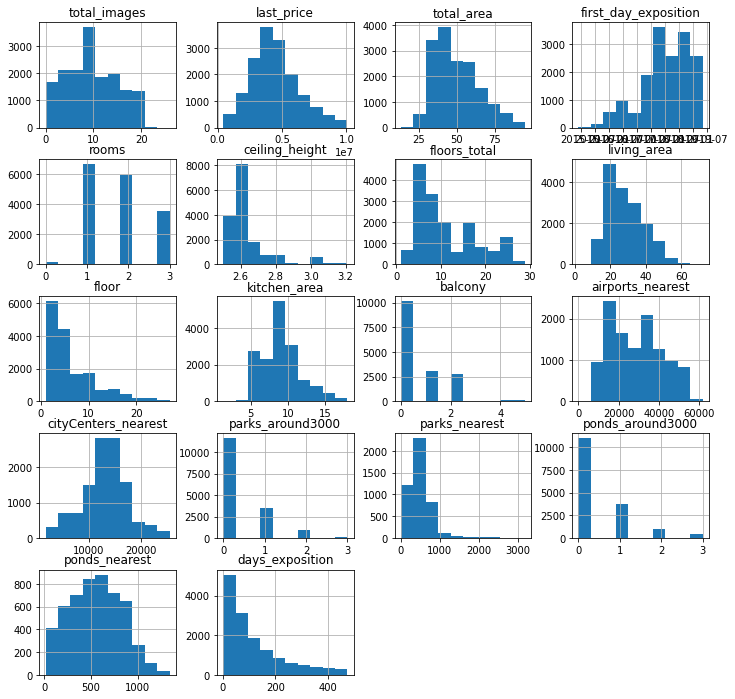

In [47]:
data.hist(figsize=(12, 12))
plt.show()

In [48]:
cleaned_data = data.reset_index(drop=True)
print(cleaned_data.info())
cleaned_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16269 entries, 0 to 16268
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          16269 non-null  int64         
 1   last_price            16269 non-null  float64       
 2   total_area            16269 non-null  float64       
 3   first_day_exposition  16269 non-null  datetime64[ns]
 4   rooms                 16269 non-null  int64         
 5   ceiling_height        16269 non-null  float64       
 6   floors_total          16269 non-null  float64       
 7   living_area           16269 non-null  float64       
 8   floor                 16269 non-null  int64         
 9   is_apartment          16269 non-null  bool          
 10  studio                16269 non-null  bool          
 11  open_plan             16269 non-null  bool          
 12  kitchen_area          16269 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,7,3350000.0,40.40,2018-12-04,1,2.64,11.0,18.60,1,False,...,11.00,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
1,10,2890000.0,30.40,2018-09-10,1,2.64,12.0,14.40,5,False,...,9.10,0.0,Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
2,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,False,...,14.40,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
3,20,2900000.0,33.16,2018-05-23,1,2.64,27.0,15.43,26,False,...,8.81,0.0,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
4,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
5,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
6,10,3890000.0,54.00,2016-06-30,2,2.64,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,0.0,NaN,0.0,NaN,90.0
7,16,4650000.0,39.00,2017-11-18,1,2.64,14.0,20.50,5,False,...,7.60,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0
8,11,6700000.0,82.00,2017-11-23,3,3.05,5.0,55.60,1,False,...,9.00,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
9,8,3250000.0,31.00,2017-01-27,1,2.50,5.0,19.40,2,False,...,5.60,1.0,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0


При предобработке данных были удалены пропуски, дубликаты, выбросы а также изменён тип одного из полей.
* Единственный тип дубликатов был в столбце locality_name из-за наличия в нём строк отличающихся лишь буквой е и ё. *Выбросы были в большинстве числовых столбцов, из-за того что-то нам нужна общая информация по квартирам и безыитересены аномалии, мы выбросили все числовые значения за пределами в полтора межкантильных интервала от первого и третьего квантиля. 
* Пропуски были также в большинстве столбцов, некоторые из-за человеческих ошибок, некоторые из-за технических. 
 * В столбцах, где не было никакой дополнительной информации пришлось заполнить пропуски медианным значением.В столбце is_apartment принято решение заполнить пропущенные значения значением False. Это решение основано на предположении, что если человек не указывает специально, что квартира является апартаментами, то она скорее всего ими не является. В стобце balcony было решено, что если значение не казано, то балконов нет вовсе. 
 * В ходе анализа было выяснено, что пропуски в столбцах parks_nearest, ponds_nearest вызваны отсутствием в обозримом радиусе парков или прудов, поэтому пропуски ропуски было нельзя никак заполнить.
 * Отсутствие данных в некоторых строках колонки days_exposition вызвано тем, что обЪвление о продаже ещё не снято, так что их мы тоже не можем заполнить.
* Единственный столбец в котором поменяли тип это first_day_exposition, изначально строковый тип был заменён на времнной. 

## Посчитайте и добавьте в таблицу новые столбцы

Создаём столбец с ценой за 1 квадратный метр

In [49]:
cleaned_data["square_meter_price"] = (cleaned_data["last_price"] / cleaned_data["living_area"]).round(2)
cleaned_data["square_meter_price"].head()

0    180107.53
1    200694.44
2    349056.60
3    187945.56
4    123853.21
Name: square_meter_price, dtype: float64

Добавим столбцы с днём недели, месяцем и годом публикации объявления

In [50]:
#Creating column with number of day of week
cleaned_data["day"] = cleaned_data["first_day_exposition"].dt.weekday
cleaned_data["day"]

0        1
1        0
2        3
3        2
4        6
        ..
16264    3
16265    4
16266    0
16267    6
16268    4
Name: day, Length: 16269, dtype: int64

In [51]:
cleaned_data["month"] = cleaned_data["first_day_exposition"].dt.month
cleaned_data["month"]

0        12
1         9
2        11
3         5
4         2
         ..
16264     7
16265     7
16266     1
16267     2
16268     7
Name: month, Length: 16269, dtype: int64

In [52]:
cleaned_data["year"] = cleaned_data["first_day_exposition"].dt.year
cleaned_data["year"]

0        2018
1        2018
2        2017
3        2018
4        2017
         ... 
16264    2018
16265    2017
16266    2018
16267    2018
16268    2017
Name: year, Length: 16269, dtype: int64

Добавим столбец с типом этажа(значения — «первый», «последний», «другой»)

In [53]:
#Creating function
def categorize_floor(row):
    if row["floor"] == 1:
        return "Первый"
    elif row["floor"] == row["floors_total"]:
        return "Последний"
    else:
        return "Другой"

In [54]:
cleaned_data["floor_type"] = cleaned_data.apply(categorize_floor, axis=1)
cleaned_data["floor_type"]

0        Первый
1        Другой
2        Другой
3        Другой
4        Другой
          ...  
16264    Другой
16265    Другой
16266    Другой
16267    Первый
16268    Первый
Name: floor_type, Length: 16269, dtype: object

Добавляем столбец с расстоянием до центра города в километрах

In [55]:
cleaned_data["cityCenters_nearest_km"] = (cleaned_data["cityCenters_nearest"] / 1000).round()
cleaned_data["cityCenters_nearest_km"]

0        19.0
1         NaN
2        19.0
3         NaN
4        15.0
         ... 
16264     6.0
16265     NaN
16266     NaN
16267     NaN
16268     NaN
Name: cityCenters_nearest_km, Length: 16269, dtype: float64

Для дальнейшего анализа данных были созданы столбцы с ценой одного квадратного метра, с днём недели, месяцем и годом публикации объявления,
типом этажа квартиры и расстоянием до центра города в километрах. 

## Проведите исследовательский анализ данных

Рассмотрим отдельно гистограммы распределения некоторых параметров

In [56]:
research_columns = ["last_price", "ceiling_height", "floors_total", "total_area", "living_area", "kitchen_area", "cityCenters_nearest",  "rooms"]

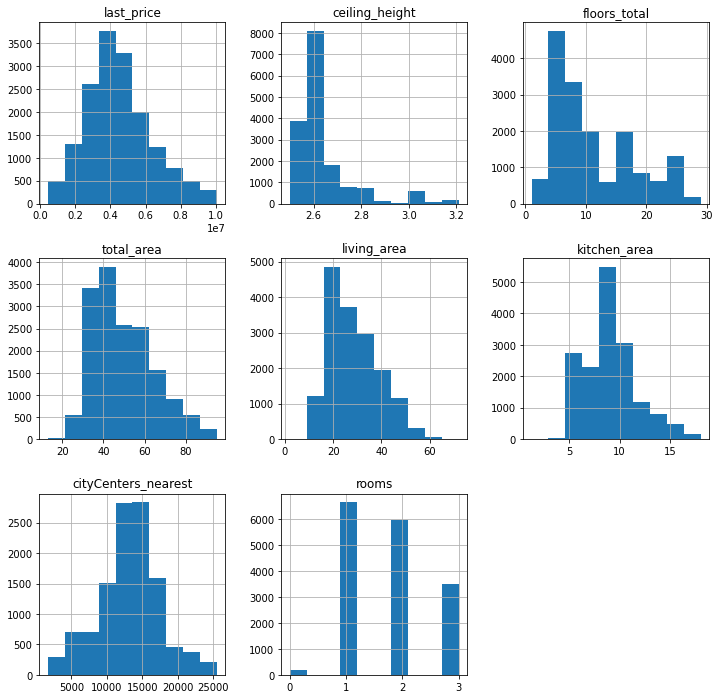

In [57]:
cleaned_data[research_columns].hist(figsize=(12, 12))
plt.show()

Так как все выбросы были удалены при предобработке, то гистограммы в большинстве своём показывают распределения похожие на нормальное. Выделяются лишь столбцы cityCenters_nearest - большое количество больших значений оставлено специально, дабы была возможность увидеть какие квартиры расположены очень далеко от центра, ceiling_heights - есть небольшой скачок справа который выбивается за нормальное распределение и колонка rooms, с ограниченным набором дискретных значений её рассмотрим отдельно.

In [58]:
cleaned_data["rooms"].value_counts()

1    6637
2    5943
3    3511
0     178
Name: rooms, dtype: int64

Мы нашли уникальный ноль-комнатные квартиры, стоит их удалить.

In [59]:
cleaned_data = cleaned_data[cleaned_data["rooms"] != 0]

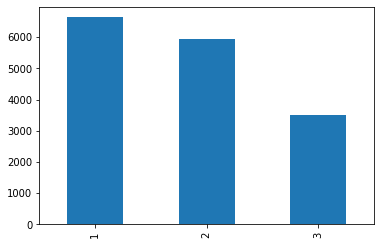

In [60]:
cleaned_data["rooms"].value_counts().plot(kind="bar");

Наибольшее количество квартир однокомнатные, меньше всего трёхкомнатных.

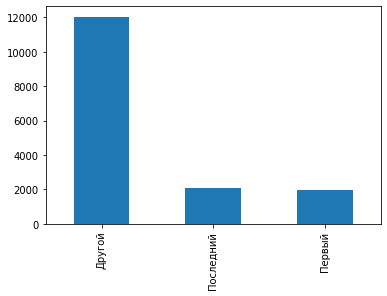

In [61]:
cleaned_data["floor_type"].value_counts().plot(kind="bar");

Как и ожидалось количество квартир на первом и последних этажах меньше, чем на других.

Рассмотрим параметр длительности продажи квартиры

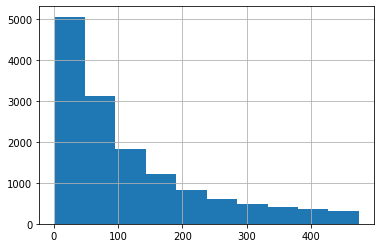

count    14237.000000
mean       117.971834
std        111.964587
min          1.000000
25%         38.000000
50%         75.000000
75%        167.000000
max        475.000000
Name: days_exposition, dtype: float64

In [62]:
data["days_exposition"].hist()
plt.show()
data["days_exposition"].describe()

Видно, что медианное время продажи составляет 78 дней, 1-й квантиль - 44, 3-й квантиль - 149, соответственно можно сказать, что в большинстве случаев квартиру удаётся продать быстрее, чем за 150 дней. Быстрой, можно назвать сделку, совершённую менее, чем за 44 дня, долгой ту, которую пришлось ждать больше 150 дней. 

Теперь рассмотрим линейную связь между признакми с помощью коофициента корреляции Пирсона.

In [63]:
connection = {"zero" : [], "weak" : [], "medium" : [], "notable" : [], "hight" : [], "very_hight" : []}
for column in cleaned_data.select_dtypes(include='number').columns:
    correlation_coefficient = abs(cleaned_data['last_price'].corr(cleaned_data[column]))
    if correlation_coefficient <= 0.1:
        connection["zero"].append(column)
    elif correlation_coefficient <= 0.3:
        connection["weak"].append(column)
    elif correlation_coefficient <= 0.5:
        connection["medium"].append(column)
    elif correlation_coefficient <= 0.7:
        connection["notable"].append(column)
    elif correlation_coefficient <= 0.9:
        connection["hight"].append(column)
    elif correlation_coefficient <= 0.99:
        connection["very_hight"].append(column)
print(json.dumps(connection, indent=4))

{
    "zero": [
        "balcony",
        "airports_nearest",
        "parks_nearest",
        "ponds_nearest",
        "days_exposition",
        "day",
        "month",
        "year"
    ],
    "weak": [
        "total_images",
        "ceiling_height",
        "floors_total",
        "floor",
        "cityCenters_nearest",
        "parks_around3000",
        "ponds_around3000",
        "cityCenters_nearest_km"
    ],
    "medium": [
        "rooms",
        "living_area",
        "kitchen_area",
        "square_meter_price"
    ],
    "notable": [
        "total_area"
    ],
    "hight": [],
    "very_hight": []
}


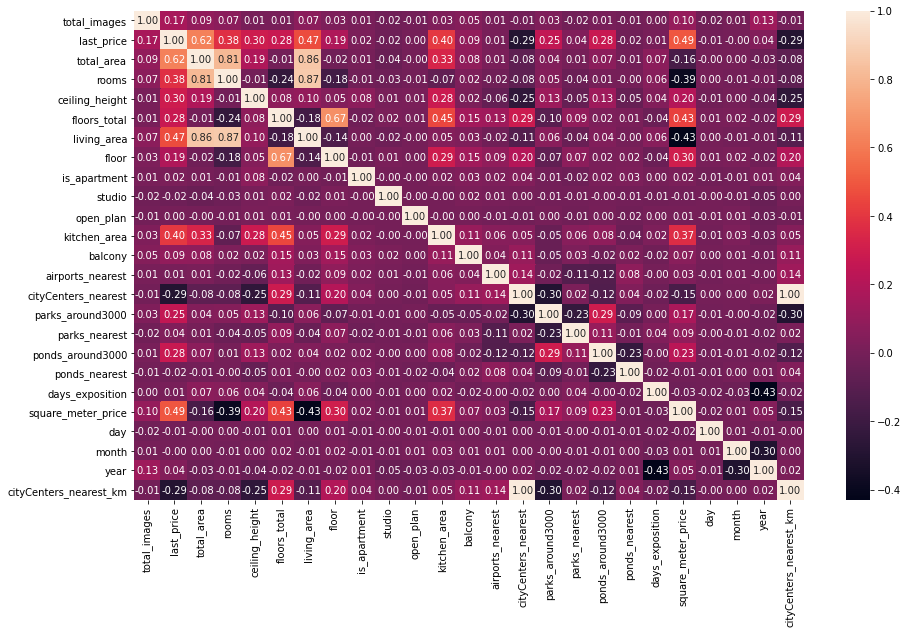

In [64]:
#creating and visualizing a correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(cleaned_data.corr(), annot=True, fmt='.2f')
plt.show()

У большинства параметров с ценой либо нет никакой линейной связи, либо она слабая. Но всё-таки некая связь присутствует:
* Умеренная связь
 * Количество комнат = 0.38
 * Жилая площадь = 0.47
 * Площадь кухни = 0.40
 * Цена 1 квадратного метра = 0.49
* Заметная связь
 * Общая площадь = 0.62 

Посмотрим влияние некоторых параметров на цену квартиры

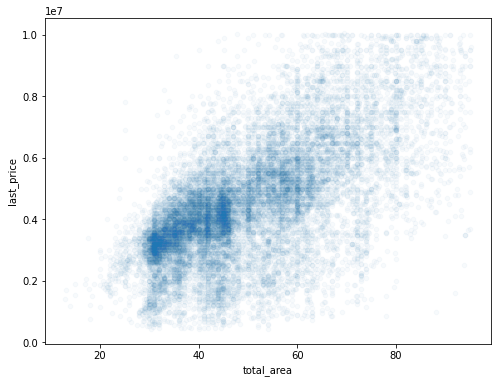

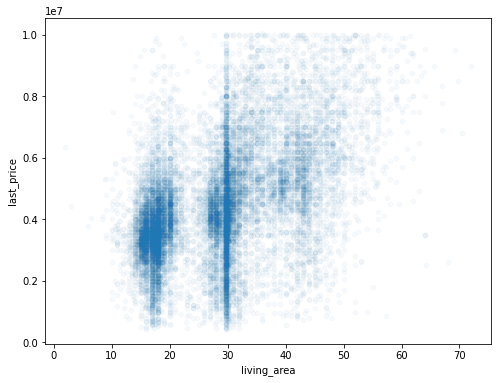

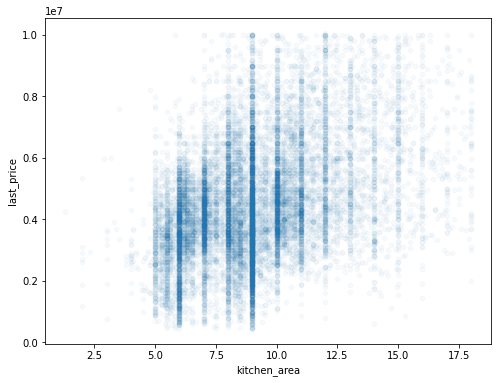

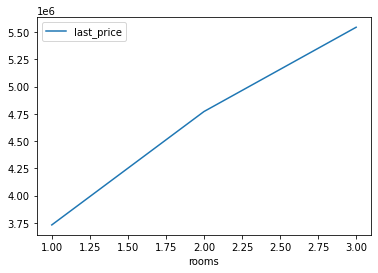

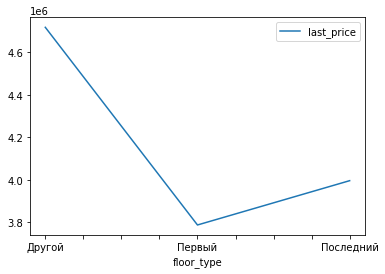

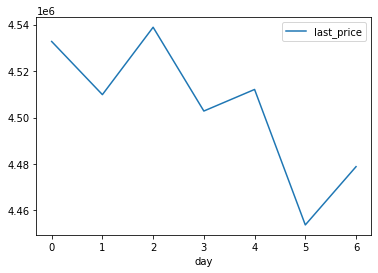

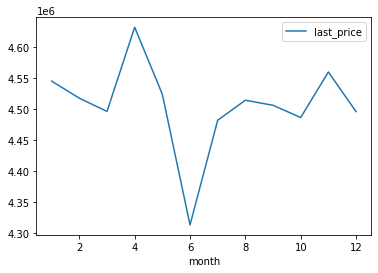

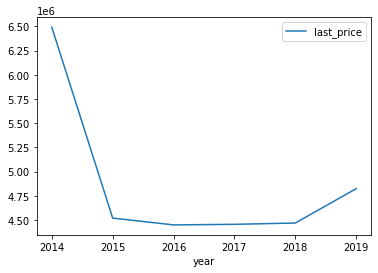

In [65]:
check_price_columns = ["total_area", "living_area", "kitchen_area"]
for column in check_price_columns:
    cleaned_data.plot(x=column, y="last_price", kind='scatter', alpha=0.03, figsize=(8, 6))
check_price_columns_agg = ["rooms", "floor_type", "day", "month", "year"]
for column in check_price_columns_agg:
    cleaned_data.pivot_table(values="last_price", index=column).plot()
    plt.show()

Из графиков видно, что все исследуемые параметры как-то влияют на цену квартир. Увеличение общей площади квартиры, площади жилой и кухни, количества комнат ведёт к увеличению цены квартиры. Цена квартир на первом и последнем этажах в среднем сильно меньше, чем на остальных. Цена на квартиры выставляемые на продажу в выходные дни обычно меньше, чем в будние. Цена на квартиру практически не зависит от месяца выставления на продажу, единственное исключение июнь, квартиры выставляемые в этот месяц в среднем сильно дешевле. Видно, что в 2014 году квартиры стоили дороже всего, потом в 2015-2016 цена сильно упала и с 2017 начинает медленно расти.

Средняя цена за квадратный метр по всей России 77021.96


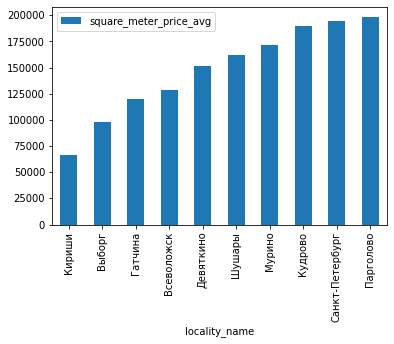

In [66]:
#Grouping data by "locality_name" and calculate the average price per square meter and amount of advertisements
pivot_table = cleaned_data.groupby("locality_name").agg({"square_meter_price": "mean", "locality_name" : "count"})
pivot_table.columns = ["square_meter_price_avg", "amount"]
print("Средняя цена за квадратный метр по всей России", pivot_table["square_meter_price_avg"].mean().round(2))
#Take 10 rows with most amount of advertisements
pivot_table = pivot_table.sort_values(by="amount", ascending=False).head(10)
#Sort rows by price
pivot_table = pivot_table.sort_values(by="square_meter_price_avg")
#visualizing
pivot_table.plot(y="square_meter_price_avg",kind="bar")
plt.show()

Самая большая цена за квадратный метр в Санкт-Петербурге, Кудрово и Парголово, а наименьшая в населённых пунктах Кириши, Выборг, Гатчина

<AxesSubplot:xlabel='cityCenters_nearest_km'>

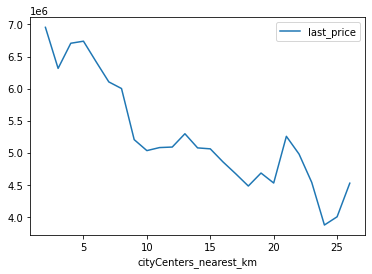

In [67]:
cleaned_data_piter = cleaned_data[cleaned_data["locality_name"] == "Санкт-Петербург"]
cleaned_data_piter.pivot_table(index="cityCenters_nearest_km", values="last_price").plot()

В среднем чем дальше от центра, тем дешевле квартира

## Общий вывод

В этой работе была проведена предобработка данных, обработка и последущий исследовательский анализ.
При предобработке мы выполнили следующие пункты:
* Заполнили большинство пропусков. В большинстве случаев они заполнялись медианным значение, исключениями стали поля с удалённость объекта от квартиры - там пропуски были вызваны слишком большим расстоянием и столбец с временем за которое была совершена продажа - в нём данные отсутсвовали в том случае, если сделка ещё не была совершена.Такие пропуски заполнены не были. Пропущенное значения в данных были вызваны как человеческим фактором(не указывали количество балконов если их не было или не заполняли поле is_apartment если квартира не является апартаментами), так и техническим недочётом(не указывались расстояния до прудов и парков, если их не было в радисе 3км).
* Удалили все выбросы, из расчёта, что аномалии в данных находятся на расстоянии болше 1.5 межквантильных размаха перед первым и после 3 квантиля
* Нашли и обработали неявные дубликаты в столбце с названиями населённых пунктов
* Измененили тип столбца first_day_exposition на временной.

Далее были вычислены и добавлены 6 столбцов с дополнительной информацией
* цена одного квадратного метра
* день недели публикации объявления 
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры 
* расстояние до центра города в километрах

И в конце проведён исследовательский анализ данных по следующим пунктам
* _Исследование зависимости ислледуемого параметра last_price от остальных_
 * Как выяснилось у большинства параметров с ценой либо нет никакой линейной связи, либо она слабая. Но всё-таки некая связь присутствует:
  * Умеренная связь
   * Количество комнат, коофициент корреляции = 0.38
   * Жилая площадь, коофициент корреляции = 0.47
   * Площадь кухни, коофициент корреляции = 0.40
   * Цена 1 квадратного метра, коофициент корреляции = 0.49
  * Заметная связь
   * Общая площадь, коофициент корреляции = 0.62
  * Также было выяснено, что: 
   * Цена квартир на первом и последнем этажах в среднем сильно меньше, чем на остальных. 
   * Цена на квартиры выставляемые на продажу в выходные дни обычно меньше, чем в будние. 
   * Цена на квартиру практически не зависит от месяца выставления на продажу, единственное исключение июнь, квартиры выставляемые в этот месяц в среднем сильно дешевле. 
 * В 2014 году квартиры стоили дороже всего, потом в 2015-2016 цена сильно упала и с 2017 начинает медленно расти.
* _Подсчёт средней цены одного квадратного метра_
 * Средняя цена за квадратный метр по всей России 77021.96 рублей.
 * Самая большая цена за квадратный метр в Санкт-Петербурге, Кудрово и Парголово, а наименьшая в населённых пунктах Кириши, Выборг, Гатчина
* _Проверка зависисмоти цены квартиры от расстояния до центра в Санкт-Петербурге_
 * При исследовании было выяснено, что чем дальше от центра Питера, тем дешевле квартира.
 
 
___В целом мы достигли основной цели исследования - определили параметры от которых зависит цена квартиры, для последующего использования их в предсказательной модели. Советуется использовать такие признаки исходных данных как:___ 
* kitchen_area — площадь кухни в квадратных метрах (м²)
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* rooms — число комнат
* total_area — общая площадь квартиры в квадратных метрах (м²)
* first_day_exposition — дата публикации
* cityCenters_nearest — расстояние до центра города (м)

___А также рассчитать и использовать___
* Цену 1 квадратного метра (нужно поделить стоимость объекта на его общую площадь)
* Тип этажа квартиры («первый», «последний», «другой»)